<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



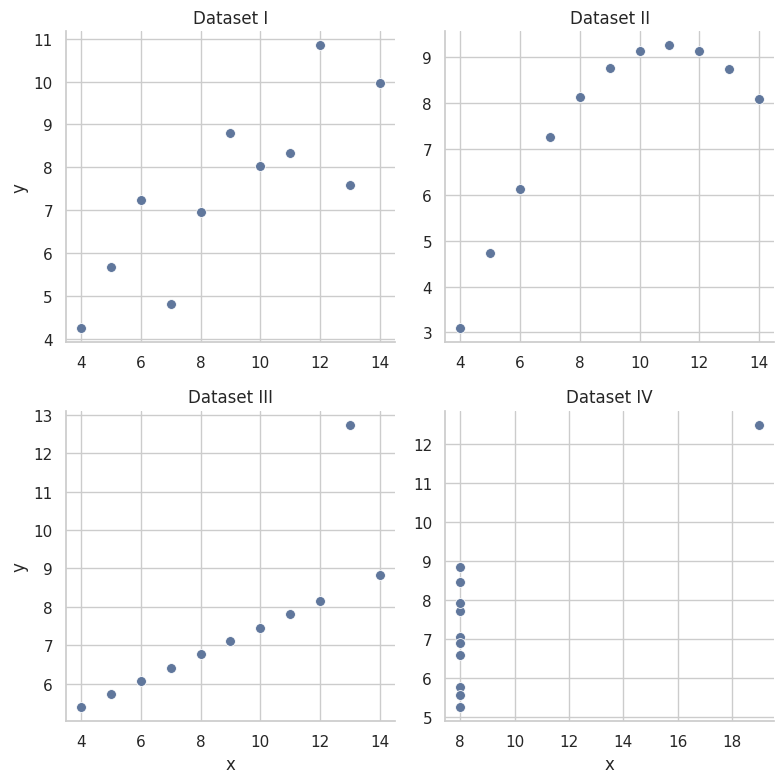

In [2]:
g = sns.FacetGrid(data, col="dataset", col_wrap=2, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.scatterplot, x="x", y="y", s=50)
g.set_titles("Dataset {col_name}")
g.set_axis_labels("x", "y")
plt.tight_layout()
plt.show()

Es evidente que los grupos tienen distribuciones distintas.
Dataset I, presenta un patrón lineal pues los puntos siguen una distribucion ascendente de forma recta.
Dataset II, en este caso los datos siguen una distribución curva, como una parábola, lo que una recta no lograría representar de forma correcta.
Dataset III, es evidente que en la mayoría de este grupo se sigue una distribución lineal, aunque por la presencia de un punto, una recta que intente representarlos puede verse drásticamente afectada.
Dataset IV, los puntos se concentran en una recta vertical a excepción de uno aislado que afectará en las representaciones.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
desc = data.groupby("dataset")[["x", "y"]].describe().round(3)
desc

x                                            y                \
        count mean    std  min  25%  50%   75%   max count   mean    std   
dataset                                                                    
I        11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
II       11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
III      11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.500  2.030   
IV       11.0  9.0  3.317  8.0  8.0  8.0   8.0  19.0  11.0  7.501  2.031   

                                         
          min    25%   50%   75%    max  
dataset                                  
I        4.26  6.315  7.58  8.57  10.84  
II       3.10  6.695  8.14  8.95   9.26  
III      5.39  6.250  7.11  7.98  12.74  
IV       5.25  6.170  7.04  8.19  12.50

Observemos que todos los grupos comparten valores muy similares en términos de estadísticas descriptivas.
Sin embargo, estas estadísticas nos esconde diferencias notables en la estructura de los datos. Es decir estos datos no bastan para comprender las distribuciones.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



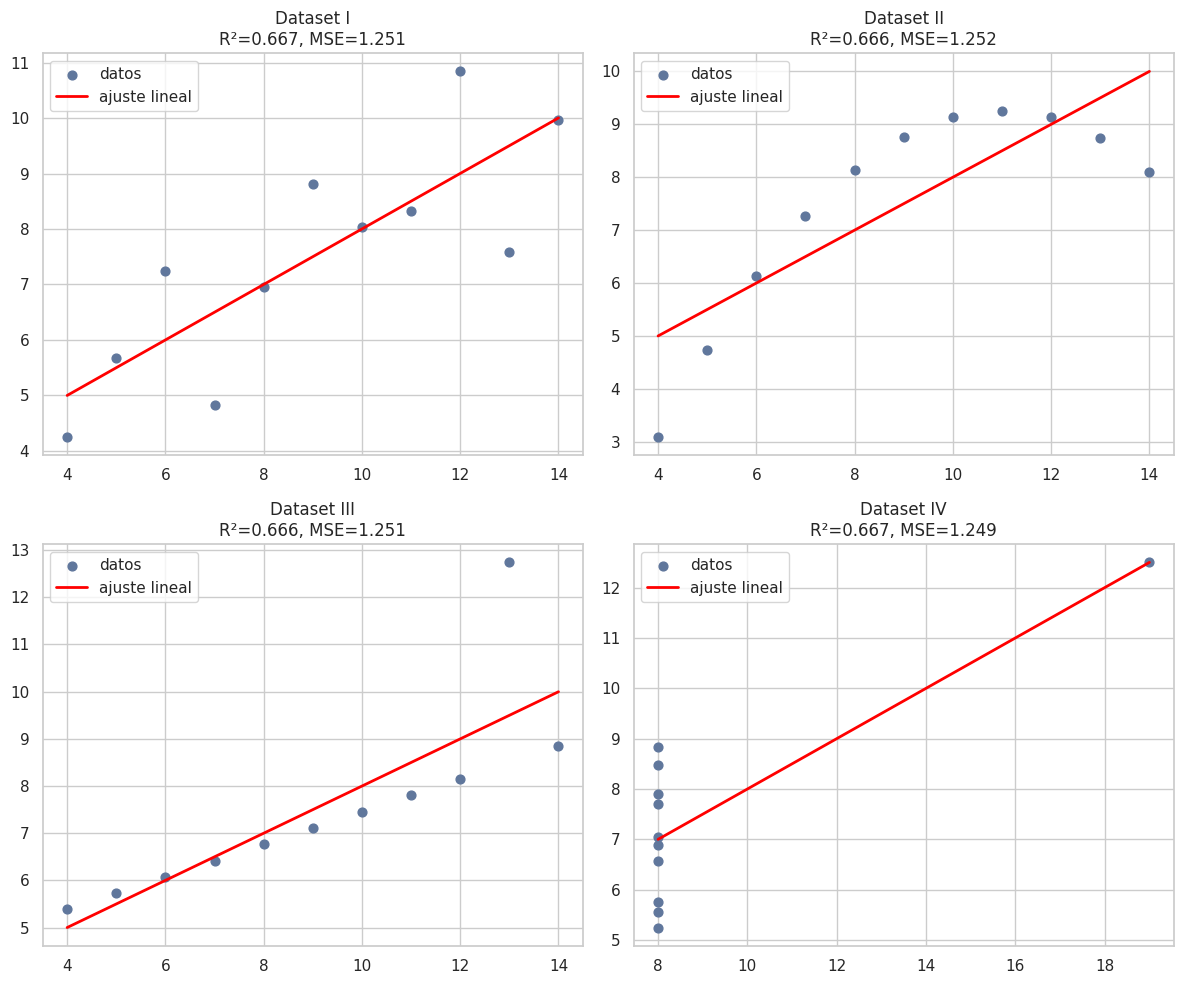

,dataset,coef,intercept,MSE,R2
0,I,0.5001,3.0001,1.2512,0.6665
1,II,0.5000,3.0009,1.2524,0.6662
2,III,0.4997,3.0025,1.2506,0.6663
3,IV,0.4999,3.0017,1.2493,0.6667


In [8]:
res = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, dfg) in zip(axes, data.groupby("dataset")):
    X = dfg[["x"]].values
    y = dfg["y"].values

    lr = LinearRegression().fit(X, y)
    yhat = lr.predict(X)

    mse = mean_squared_error(y, yhat)
    r2 = r2_score(y, yhat)
    res.append({"dataset": name, "coef": lr.coef_[0], "intercept": lr.intercept_, "MSE": mse, "R2": r2})

    ax.scatter(X, y, s=40, label="datos")
    xx = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    ax.plot(xx, lr.predict(xx), color="red", lw=2, label="ajuste lineal")
    ax.set_title(f"Dataset {name}\nR²={r2:.3f}, MSE={mse:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()

pd.DataFrame(res).round(4).sort_values("dataset")

Notemos que a pesar de que los 4 conjuntos presentan estadísticas similares, los gráficos y los modelos muestran casos muy distintos. La calidad real del ajuste cambia radicalmente según la distribución de los datos. Por ende las métricas no bastan para evaluar un modelo.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

res_poly = []

for name, dfg in data.groupby("dataset"):
    X = dfg[["x"]].values
    y = dfg["y"].values

    # Modelo polinomial grado 2
    poly2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                          LinearRegression())
    poly2.fit(X, y)
    yhat2 = poly2.predict(X)
    r2_2 = r2_score(y, yhat2)
    mse_2 = mean_squared_error(y, yhat2)

    # Guardar
    res_poly.append({"dataset": name, "R2_poly2": r2_2, "MSE_poly2": mse_2})

res_poly_df = pd.DataFrame(res_poly).sort_values("dataset").round(4)

# Unir con resultados lineales para comparar
comp = res_lin_df.merge(res_poly_df, on="dataset")
comp

,dataset,coef,intercept,R2,MSE,R2_poly2,MSE_poly2
0,I,0.5001,3.0001,0.6665,1.2512,0.6873,1.1732
1,II,0.5000,3.0009,0.6662,1.2524,1.0000,0.0000
2,III,0.4997,3.0025,0.6663,1.2506,0.6847,1.1817
3,IV,0.4999,3.0017,0.6667,1.2493,0.6667,1.2493


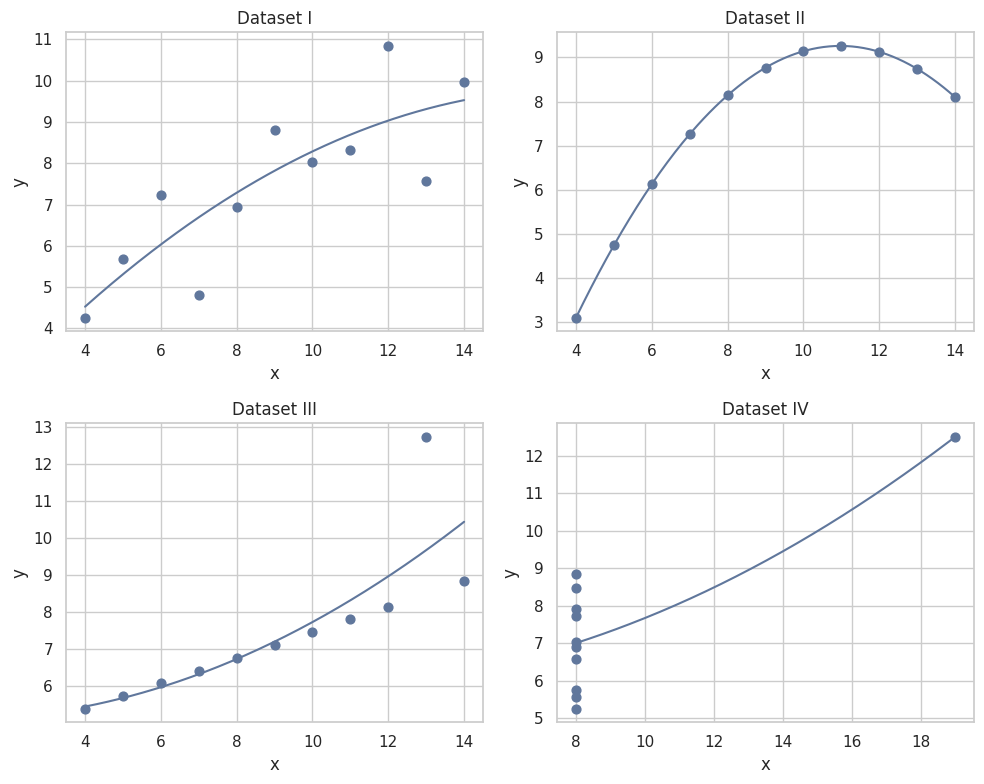

In [7]:
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, (name, dfg) in zip(axes, data.groupby("dataset")):
    X = dfg[["x"]].values
    y = dfg["y"].values
    ax.scatter(X, y, s=40)
    xx = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    poly2 = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly2.fit(X, y)
    ax.plot(xx, poly2.predict(xx))
    ax.set_title(f"Dataset {name}")
    ax.set_xlabel("x"); ax.set_ylabel("y")

plt.tight_layout(); plt.show()


El ajuste de la regresión lineal en algunos casos es inadecuado. Un modelo polinomial de grado 2 mejora el ajuste en este caso ya que algunos conjuntos tienen cierta curvatura, lo que es evidente por la comparacion entre $R^2$ y MSE de este modelo y el modelo lineal.